In [1]:
import json
import gzip
import pandas as pd


In [2]:
# !pip install torch

In [3]:
!python -c "import torch; print(torch.__version__)"

2.4.0


In [4]:
# !pip install torch-geometric

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import math
import json
import os
import collections

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import itertools
from itertools import combinations 


import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 

from sklearn import metrics
 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import torch_geometric
from torch_geometric.data import Data
from torch_geometric.data import DataLoader as DataLoaderGraph
from torch_geometric.data import Dataset as DatasetGraph
from torch_geometric.data import Batch as BatchGraph

import torch_geometric.transforms as T
#from torch_geometric.transforms import AddTrainValTestMask as masking

from torch_geometric.nn import GCNConv, BatchNorm, SAGEConv, SGConv, ChebConv
from torch_geometric.utils.convert import to_networkx

import networkx as nx

In [6]:
# json_content = []
# with open(filename, 'r', encoding='utf-8') as file:
#     for line in file:
#         line = line.strip()
#         if line:  # Ensure the line is not empty
#             try:
#                 obj = json.loads(line)
#                 json_content.append(obj)
#             except json.JSONDecodeError as e:
#                 print(f"Skipping invalid JSON line: {line}")
#                 print(f"Error: {e}")

# print(json.dumps(json_content[:10], indent=4))  # Pretty-print data parsed.

# # Read data from output.json
# with open('output.json', 'r', encoding='utf-8') as f:
#     data = json.load(f)

# # Pretty-print the loaded data
# print(json.dumps(data, indent=4))


In [7]:
# edge

csv_filename = '/Users/tjgumingming/Documents/Northwestern/Summer_2024/MSDS458/finalproject/git_web_ml/musae_git_edges.csv'

# Load the CSV file into a DataFrame
edges = pd.read_csv(csv_filename)

# Display the first few rows of the DataFrame
print(edges.head(20))

    id_1   id_2
0      0  23977
1      1  34526
2      1   2370
3      1  14683
4      1  29982
5      1  21142
6      1  20363
7      1  23830
8      1  34035
9   6067  19720
10  6067  20183
11     3   4950
12     3  18029
13     3   3358
14     3  34935
15     3   5916
16     4   2865
17     4   9342
18     5  27803
19     6  27803


In [8]:
csv_filename = '/Users/tjgumingming/Documents/Northwestern/Summer_2024/MSDS458/finalproject/git_web_ml/musae_git_target.csv'

# Load the CSV file into a DataFrame
target_df = pd.read_csv(csv_filename)

# Convert numeric "ml_target" to categorical objects
# Convert the numeric column to categorical
target_df['ml_target'] = target_df['ml_target'].astype('category')

# Display the first few rows of the DataFrame
print(target_df.head())

   id          name ml_target
0   0        Eiryyy         0
1   1    shawflying         0
2   2   JpMCarrilho         1
3   3     SuhwanCha         0
4   4  sunilangadi2         1


In [9]:
# with open('/Users/tjgumingming/Documents/Northwestern/Summer_2024/MSDS458/finalproject/git_web_ml/musae_git_features.json', 'r', encoding='utf-8') as file:
#     json_data = json.load(file)

# # Pretty-print the JSON data
# print(json.dumps(json_data[:100], indent=4))

In [10]:
with open("/Users/tjgumingming/Documents/Northwestern/Summer_2024/MSDS458/finalproject/git_web_ml/musae_git_features.json") as json_data:
    features_data = json.load(json_data)

In [11]:
features_data

{'0': [1574,
  3773,
  3571,
  2672,
  2478,
  2534,
  3129,
  3077,
  1171,
  2045,
  1539,
  902,
  1532,
  2472,
  1122,
  2480,
  3098,
  2115,
  1578],
 '1': [1193,
  376,
  73,
  290,
  3129,
  1852,
  3077,
  1171,
  1022,
  2045,
  536,
  2040,
  1533,
  1532,
  2472,
  673,
  798],
 '2': [1574,
  3773,
  925,
  1728,
  2815,
  2963,
  3077,
  364,
  1171,
  536,
  1867,
  2472,
  1122,
  2532,
  664,
  28,
  3311,
  1768,
  869],
 '3': [3964,
  3773,
  4003,
  928,
  1852,
  3077,
  364,
  1022,
  3763,
  2045,
  3859,
  3771,
  234,
  664,
  703],
 '4': [1929,
  3773,
  1793,
  3511,
  1290,
  3129,
  3077,
  364,
  1171,
  1022,
  2045,
  536,
  1119,
  91,
  1532,
  3771,
  1122,
  703,
  1001],
 '5': [1574,
  3773,
  1793,
  2934,
  1088,
  2465,
  1618,
  1233,
  2282,
  2947,
  2211,
  1087,
  3129,
  1852,
  3077,
  1171,
  3763,
  2045,
  536,
  137,
  3849,
  1532,
  2472,
  2371,
  2266,
  703],
 '6': [3964,
  509,
  3214,
  581,
  364,
  1171,
  1022,
  3763,
  2045

In [12]:
feats=[]
feat_counts=[]
for i in range(len(features_data)):
    feat_counts+=[len(features_data[str(i)])]
    feats+=features_data[str(i)]

In [13]:
feats

# Each number in the values represents a feature.

[1574,
 3773,
 3571,
 2672,
 2478,
 2534,
 3129,
 3077,
 1171,
 2045,
 1539,
 902,
 1532,
 2472,
 1122,
 2480,
 3098,
 2115,
 1578,
 1193,
 376,
 73,
 290,
 3129,
 1852,
 3077,
 1171,
 1022,
 2045,
 536,
 2040,
 1533,
 1532,
 2472,
 673,
 798,
 1574,
 3773,
 925,
 1728,
 2815,
 2963,
 3077,
 364,
 1171,
 536,
 1867,
 2472,
 1122,
 2532,
 664,
 28,
 3311,
 1768,
 869,
 3964,
 3773,
 4003,
 928,
 1852,
 3077,
 364,
 1022,
 3763,
 2045,
 3859,
 3771,
 234,
 664,
 703,
 1929,
 3773,
 1793,
 3511,
 1290,
 3129,
 3077,
 364,
 1171,
 1022,
 2045,
 536,
 1119,
 91,
 1532,
 3771,
 1122,
 703,
 1001,
 1574,
 3773,
 1793,
 2934,
 1088,
 2465,
 1618,
 1233,
 2282,
 2947,
 2211,
 1087,
 3129,
 1852,
 3077,
 1171,
 3763,
 2045,
 536,
 137,
 3849,
 1532,
 2472,
 2371,
 2266,
 703,
 3964,
 509,
 3214,
 581,
 364,
 1171,
 1022,
 3763,
 2045,
 1366,
 1532,
 2472,
 3794,
 3711,
 1193,
 1249,
 1663,
 819,
 1171,
 1022,
 2045,
 1026,
 2311,
 1532,
 2472,
 3794,
 664,
 703,
 1193,
 1051,
 3571,
 3129,
 1171

In [14]:
feat_counts

[19,
 17,
 19,
 15,
 19,
 26,
 14,
 14,
 15,
 16,
 16,
 22,
 20,
 13,
 17,
 22,
 26,
 19,
 17,
 18,
 16,
 20,
 15,
 17,
 14,
 16,
 10,
 14,
 19,
 23,
 23,
 16,
 18,
 15,
 20,
 14,
 17,
 17,
 17,
 19,
 17,
 18,
 16,
 13,
 17,
 19,
 22,
 16,
 15,
 20,
 25,
 25,
 14,
 19,
 20,
 17,
 16,
 27,
 17,
 23,
 19,
 22,
 24,
 28,
 16,
 21,
 14,
 14,
 25,
 16,
 20,
 16,
 15,
 21,
 17,
 22,
 20,
 20,
 17,
 22,
 26,
 13,
 18,
 18,
 21,
 23,
 15,
 19,
 16,
 22,
 18,
 16,
 13,
 20,
 20,
 22,
 19,
 14,
 21,
 13,
 27,
 18,
 20,
 17,
 14,
 21,
 15,
 18,
 13,
 19,
 13,
 23,
 18,
 17,
 18,
 16,
 17,
 18,
 17,
 25,
 19,
 17,
 18,
 21,
 19,
 21,
 15,
 16,
 21,
 15,
 14,
 17,
 14,
 18,
 15,
 17,
 14,
 18,
 24,
 16,
 11,
 21,
 23,
 24,
 19,
 15,
 21,
 18,
 17,
 26,
 16,
 23,
 17,
 25,
 23,
 14,
 13,
 16,
 22,
 14,
 21,
 17,
 15,
 19,
 16,
 20,
 17,
 26,
 18,
 22,
 18,
 12,
 21,
 15,
 15,
 19,
 13,
 15,
 16,
 14,
 19,
 13,
 15,
 15,
 17,
 13,
 23,
 25,
 18,
 21,
 14,
 17,
 13,
 16,
 21,
 18,
 19,
 18,
 17,
 20,


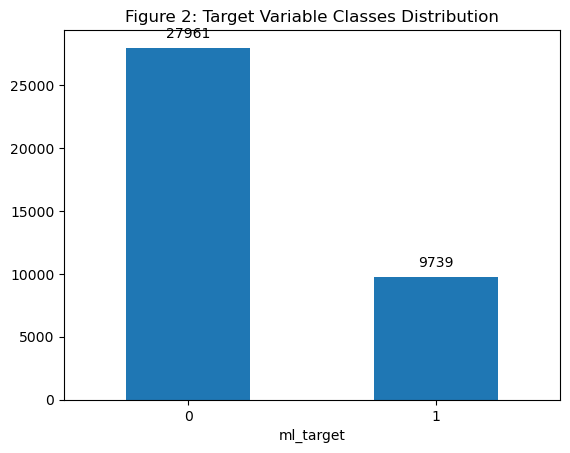

In [15]:
# Plot the bar chart
ax = target_df['ml_target'].value_counts().sort_index().plot(kind='bar')

# Annotate each bar with the number of occurrences
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Figure 2: Target Variable Classes Distribution")
plt.xticks(rotation=0)  # Set the rotation of x-axis labels
plt.show()

# # Plot the histogram
# plt.hist(target_df.ml_target, bins=4)
# plt.title("Target Variable Classes Distribution")
# plt.xticks(rotation=0)  # Set the rotation of x-axis labels
# plt.show()

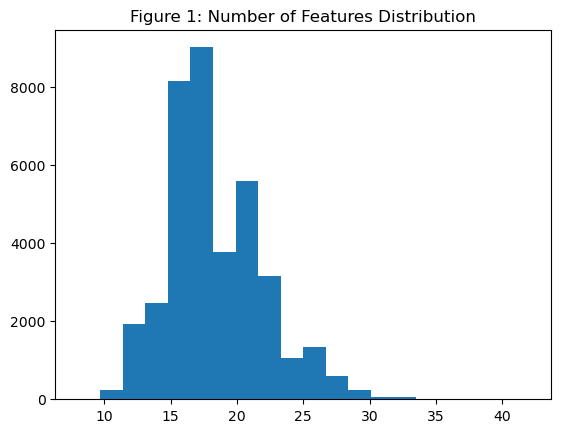

In [16]:
plt.hist(feat_counts,bins=20)
plt.title("Figure 1: Number of Features Distribution")
plt.show()

# Each key in the feature JSON represents a graph;
# For example, this histogram shows that there are around < 400 (nodes) having 10 features.

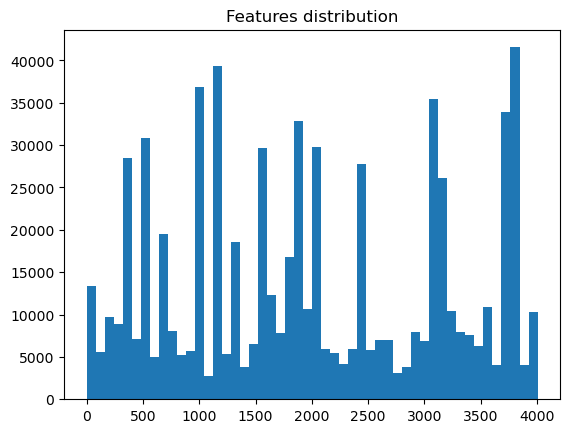

In [17]:
plt.hist(feats,bins=50)
plt.title("Features distribution")
plt.show()

In [18]:
def encode_features(light=False,n=60): 
    if light==True:
        nodes_included=n
    elif light==False:
        nodes_included=len(features_data) # data_raw
    
    data_encoded={}
    for i in range(nodes_included):# 
        one_hot_feat=np.array([0]*(max(feats)+1))
        this_feat=features_data[str(i)] # This retrieves the feature value for the current node i from features_data. The feature value is expected to be an integer.
        one_hot_feat[this_feat]=1 # where the index representing the feature's value is set to 1
        data_encoded[str(i)]=list(one_hot_feat)
    
    if light==True:
        sparse_feat_matrix=np.zeros((1,max(feats)+1))
        for j in range(nodes_included):
            temp=np.array(data_encoded[str(j)]).reshape(1,-1)
            sparse_feat_matrix=np.concatenate((sparse_feat_matrix,temp),axis=0)
        sparse_feat_matrix=sparse_feat_matrix[1:,:]
        return(data_encoded,sparse_feat_matrix)
    elif light==False:
        return(data_encoded, None)

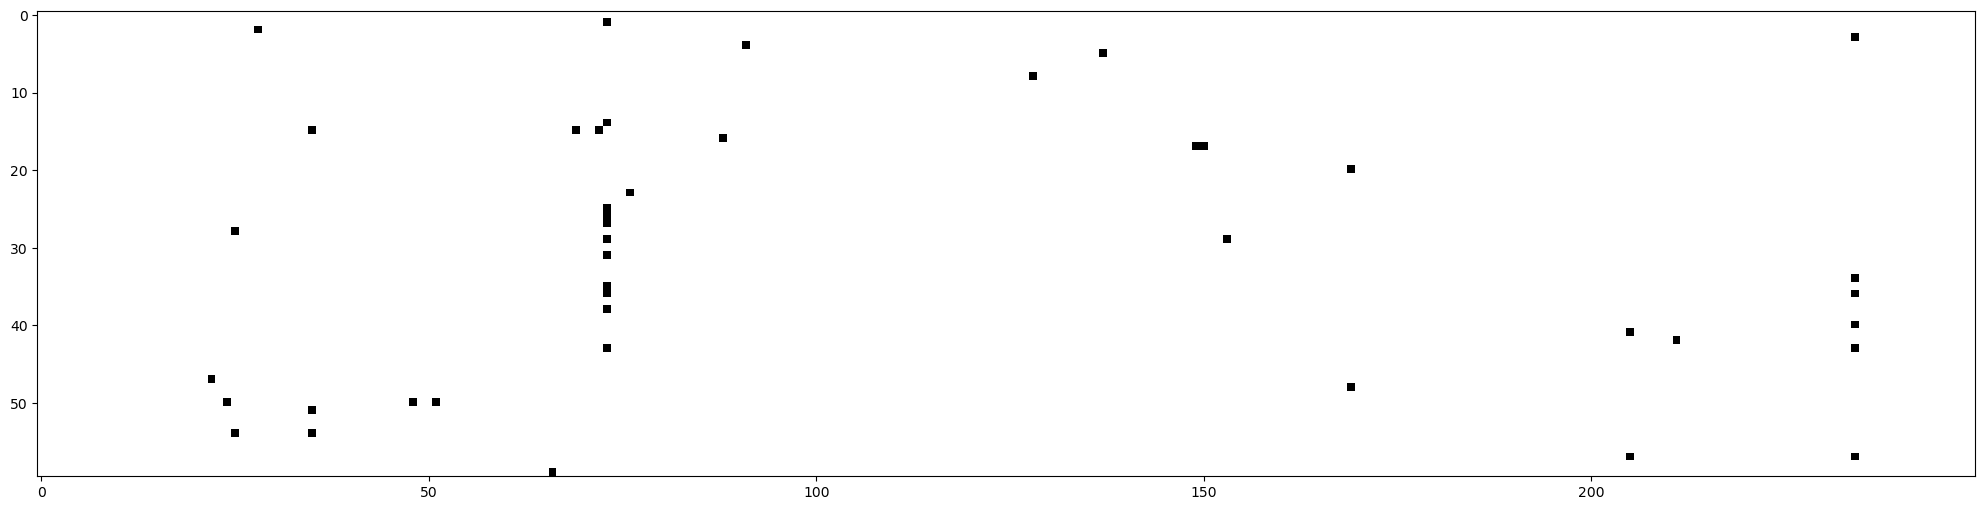

In [19]:
data_encoded_vis,sparse_feat_matrix_vis=encode_features(light=True,n=60)
plt.figure(figsize=(25,25));
plt.imshow(sparse_feat_matrix_vis[:,:250],cmap='Greys');
#plt.grid()

In [20]:
def construct_graph(data_encoded,light=False):
    node_features_list=list(data_encoded.values())
    node_features=torch.tensor(node_features_list)
    node_labels=torch.tensor(target_df['ml_target'].values)
    edges_list=edges.values.tolist()
    edge_index01=torch.tensor(edges_list, dtype = torch.long).T
    edge_index02=torch.zeros(edge_index01.shape, dtype = torch.long)#.T
    edge_index02[0,:]=edge_index01[1,:]
    edge_index02[1,:]=edge_index01[0,:]
    edge_index0=torch.cat((edge_index01,edge_index02),axis=1)
    g = Data(x=node_features, y=node_labels, edge_index=edge_index0)
    g_light = Data(x=node_features[:,0:2],
                     y=node_labels   ,
                     edge_index=edge_index0[:,:55])
    if light:
        return(g_light)
    else:
        return(g)

In [21]:
def draw_graph(data0):
    #node_labels=data0.y
    if data0.num_nodes>100:
        print("This is a big graph, can not plot...")
        return
        
    else:
        data_nx = to_networkx(data0)
        node_colors=data0.y[list(data_nx.nodes)]
        pos= nx.spring_layout(data_nx,scale =1)
        plt.figure(figsize=(12,8))
        nx.draw(data_nx, pos,  cmap=plt.get_cmap('Set1'),
                node_color =node_colors,node_size=600,connectionstyle="angle3",
                width =1, with_labels = False, edge_color = 'k', arrowstyle = "-")
        plt.title(f' Sampled {data0.num_nodes} nodes and {data0.num_edges} edges.')

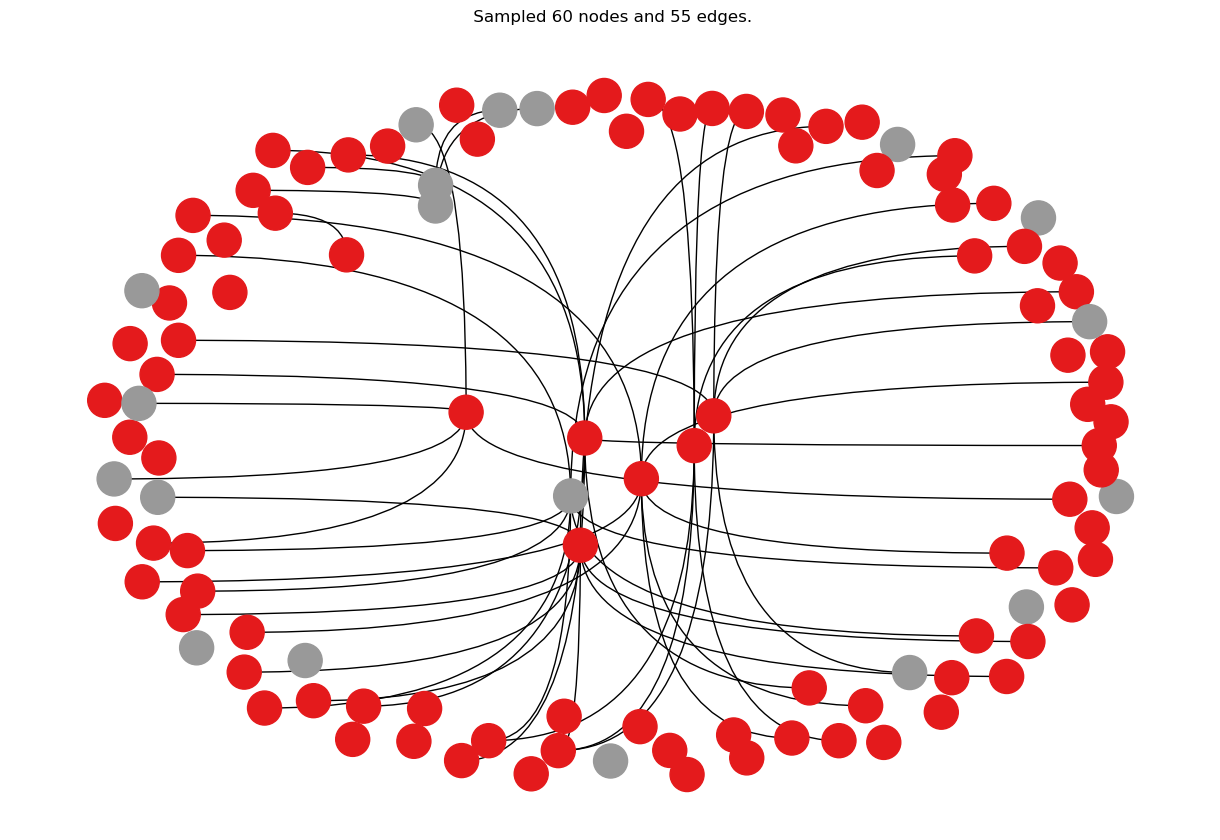

In [22]:
g_sample=construct_graph(data_encoded=data_encoded_vis,light=True)
draw_graph(g_sample)

In [23]:
data_encoded,_=encode_features(light=False) # data_encoded has 37,700 nodes

In [24]:
g=construct_graph(data_encoded=data_encoded,light=False)

In [25]:
print(g)

Data(x=[37700, 4005], edge_index=[2, 578006], y=[37700])


In [26]:
msk=T.RandomNodeSplit(split="train_rest", num_splits = 1, num_val = 0.3, num_test= 0.6)
g=msk(g)
print(g)
print()
print("training samples",torch.sum(g.train_mask).item())
print("validation samples",torch.sum(g.val_mask).item())
print("test samples",torch.sum(g.test_mask).item())

# What is the best percentage to split the data?

Data(x=[37700, 4005], edge_index=[2, 578006], y=[37700], train_mask=[37700], val_mask=[37700], test_mask=[37700])

training samples 3770
validation samples 11310
test samples 22620


In [27]:
msk_t=T.RandomNodeSplit(split="train_rest", num_splits = 1, num_val = 0.2, num_test= 0.6)
g=msk_t(g)
print(g)
print()
print("training samples",torch.sum(g.train_mask).item())
print("validation samples",torch.sum(g.val_mask).item())
print("test samples",torch.sum(g.test_mask).item())

# What is the best percentage to split the data?

Data(x=[37700, 4005], edge_index=[2, 578006], y=[37700], train_mask=[37700], val_mask=[37700], test_mask=[37700])

training samples 7540
validation samples 7540
test samples 22620


In [28]:
class SocialGNN(torch.nn.Module):
    def __init__(self,num_of_feat,f):
        super(SocialGNN, self).__init__()


        self.conv1 = GCNConv(num_of_feat, f)

        self.conv2 = GCNConv(f, 2)


    def forward(self, data):
        x = data.x.float()
        edge_index =  data.edge_index
          
        x = self.conv1(x=x, edge_index=edge_index)
        x = F.relu(x)

        x = self.conv2(x, edge_index)
        return x

In [29]:
def masked_loss(predictions,labels,mask):
    mask=mask.float()
    mask=mask/torch.mean(mask)
    loss=criterion(predictions,labels)
    loss=loss*mask
    loss=torch.mean(loss)
    return (loss)    

In [30]:
def masked_accuracy(predictions,labels,mask):
    mask=mask.float()
    mask/=torch.mean(mask)
    accuracy=(torch.argmax(predictions,axis=1)==labels).long()
    accuracy=mask*accuracy
    accuracy=torch.mean(accuracy)
    return (accuracy)    

In [31]:
def train_social(net,data,epochs=10,lr=0.01):
    optimizer = torch.optim.Adam(net.parameters(), lr=lr) # 00001
    best_accuracy=0.0
    
    train_losses=[]
    train_accuracies=[]

    val_losses=[]
    val_accuracies=[]

    test_losses=[]
    test_accuracies=[]
    
    for ep in range(epochs+1):
        optimizer.zero_grad()
        out=net(data)
        loss=masked_loss(predictions=out,
                         labels=data.y,
                         mask=data.train_mask)
        loss.backward()
        optimizer.step()
        train_losses+=[loss]
        train_accuracy=masked_accuracy(predictions=out,
                                       labels=data.y, 
                                       mask=data.train_mask)
        train_accuracies+=[train_accuracy]
        
        val_loss=masked_loss(predictions=out,
                             labels=data.y, 
                             mask=data.val_mask)
        val_losses+=[val_loss]
        
        val_accuracy=masked_accuracy(predictions=out,
                                     labels=data.y, 
                                     mask=data.val_mask)
        val_accuracies+=[val_accuracy]

        test_accuracy=masked_accuracy(predictions=out,
                                      labels=data.y, 
                                      mask=data.test_mask)
        test_accuracies+=[test_accuracy]
        if np.round(val_accuracy,4)> np.round(best_accuracy ,4):
            print("Epoch {}/{}, Train_Loss: {:.4f}, Train_Accuracy: {:.4f}, Val_Accuracy: {:.4f}, Test_Accuracy: {:.4f}"
                      .format(ep+1,epochs, loss.item(), train_accuracy, val_accuracy,  test_accuracy))
            best_accuracy=val_accuracy

  

    
    plt.plot(train_accuracies) 
    plt.plot(val_accuracies)
    plt.plot(test_accuracies) 
    plt.legend()  # Add a legend to the plot
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training, Validation, and Test Accuracies')
    plt.show()
    
    print("Best accuracy",best_accuracy) 
    return(best_accuracy)

In [32]:
# num_of_feat=g.num_node_features
# net=SocialGNN(num_of_feat=num_of_feat,f=16)
# criterion=nn.CrossEntropyLoss()
# train_social(net,g,epochs=150,lr=0.1)

### Another Method with GCN model structure

In [33]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(g.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 2)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# model = GCN(hidden_channels=16)
# print(model)

In [34]:
def train_GCN(net, data, epochs=10, lr=0.01):
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    best_accuracy = 0.0
    
    train_losses = []
    train_accuracies = []

    val_losses = []
    val_accuracies = []

    test_accuracies = []
    
    for ep in range(epochs+1):
        optimizer.zero_grad()

        # Convert node features to float
        data.x = data.x.float()
        
        out = net(data.x, data.edge_index)
        
        loss = masked_loss(predictions=out, labels=data.y, mask=data.train_mask)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
        train_accuracy = masked_accuracy(predictions=out, labels=data.y, mask=data.train_mask)
        train_accuracies.append(train_accuracy)
        
        val_loss = masked_loss(predictions=out, labels=data.y, mask=data.val_mask)
        val_losses.append(val_loss.item())
        
        val_accuracy = masked_accuracy(predictions=out, labels=data.y, mask=data.val_mask)
        val_accuracies.append(val_accuracy)

        test_accuracy = masked_accuracy(predictions=out, labels=data.y, mask=data.test_mask)
        test_accuracies.append(test_accuracy)
        
        if np.round(val_accuracy, 4) > np.round(best_accuracy, 4):
            print(f"Epoch {ep}/{epochs}, Train_Loss: {loss.item():.4f}, Train_Accuracy: {train_accuracy:.4f}, Val_Accuracy: {val_accuracy:.4f}, Test_Accuracy: {test_accuracy:.4f}")
            best_accuracy = val_accuracy

    plt.plot(train_accuracies, label='Train Accuracy') 
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy') 
    plt.legend()  # Add a legend to the plot
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training, Validation, and Test Accuracies')
    plt.show()
    
    print("Best accuracy", best_accuracy)
    return best_accuracy


In [44]:
num_of_feat=g.num_node_features
# net_1=GCN(hidden_channels=16)
# criterion=nn.CrossEntropyLoss()
# train_GCN(net_1,g,epochs=150,lr=0.1)

In [36]:
g

Data(x=[37700, 4005], edge_index=[2, 578006], y=[37700], train_mask=[37700], val_mask=[37700], test_mask=[37700])

In [45]:
num_of_feat

4005

In [46]:
print(g.x.dtype)


torch.int64


### GAT Method

In [47]:
from torch_geometric.nn import GATConv

class SocialGAT(torch.nn.Module):
    def __init__(self, num_of_feat, f, heads=8):
        super(SocialGAT, self).__init__()
        self.gat1 = GATConv(num_of_feat, f, heads=heads, dropout=0.3) # reduce dropout rate
        self.gat2 = GATConv(f * heads, 2, heads=1, concat=True, dropout=0.3) # reduce dropout rate

    def forward(self, data):
        x = data.x.float()
        edge_index = data.edge_index
        x = self.gat1(x=x, edge_index=edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.7, training=self.training) # tune dropout rate
        x = self.gat2(x, edge_index=edge_index)
        return F.log_softmax(x, dim=1)


In [ ]:
# def train_GAN(model, data, epochs):
#     model.train()  # Set model to training mode

#     for epoch in range(epochs):
#         optimizer.zero_grad()  # Clear gradients
#         out = model(data)  # Forward pass: compute predicted outputs by passing inputs to the model
#         loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Calculate the loss
#         loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
#         optimizer.step()  # Perform a single optimization step (parameter update)

#         # Optional: Print statistics
#         if epoch % 10 == 0:
#             print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

In [48]:
# New

def train_GAN(model, data, epochs):
    best_accuracy = 0.0
    train_losses=[]
    train_accuracies=[]

    val_losses=[]
    val_accuracies=[]

    test_losses=[]
    test_accuracies=[]

    for ep in range(epochs):
        optimizer.zero_grad()  # Clear gradients
        out = model(data)  # Forward pass: compute predicted outputs by passing inputs to the model
        # loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Calculate the loss
        loss = masked_loss(predictions=out, labels=data.y, mask=data.train_mask)
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Perform a single optimization step (parameter update)

        train_losses+=[loss]
        train_accuracy=masked_accuracy(predictions=out,
                                       labels=data.y, 
                                       mask=data.train_mask)
        train_accuracies+=[train_accuracy]
        
        val_loss=masked_loss(predictions=out,
                             labels=data.y, 
                             mask=data.val_mask)
        val_losses+=[val_loss]
        
        val_accuracy=masked_accuracy(predictions=out,
                                     labels=data.y, 
                                     mask=data.val_mask)
        val_accuracies+=[val_accuracy]

        test_accuracy=masked_accuracy(predictions=out,
                                      labels=data.y, 
                                      mask=data.test_mask)
        test_accuracies+=[test_accuracy]
        if np.round(val_accuracy,4)> np.round(best_accuracy ,4):
            print("Epoch {}/{}, Train_Loss: {:.4f}, Train_Accuracy: {:.4f}, Val_Accuracy: {:.4f}, Test_Accuracy: {:.4f}"
                      .format(ep+1,epochs, loss.item(), train_accuracy, val_accuracy,  test_accuracy))
            best_accuracy=val_accuracy

    
    plt.plot(train_accuracies) 
    plt.plot(val_accuracies)
    plt.plot(test_accuracies) 
    plt.legend()  # Add a legend to the plot
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    # plt.ylim(0, 1) 
    plt.title('Training, Validation, and Test Accuracies')
    plt.show()
    
    print("Best accuracy",best_accuracy) 
    return(best_accuracy)

In [49]:
num_of_feat = g.num_node_features  # Number of features per node
f = 16  # f represents the number of output features (hidden dimensions) for the layers before the final output layer # 16
heads = 8  # Number of attention heads

net_2 = SocialGAT(num_of_feat, f, heads)

In [51]:
# Define Loss Function and 

criterion = torch.nn.CrossEntropyLoss()  # Common choice for classification tasks
optimizer = torch.optim.Adam(net_2.parameters(), lr=0.01)  # Adjust learning rate as necessary

Epoch 1/100, Train_Loss: 0.1871, Train_Accuracy: 0.9228, Val_Accuracy: 0.9271, Test_Accuracy: 0.9224
Epoch 7/100, Train_Loss: 0.1856, Train_Accuracy: 0.9176, Val_Accuracy: 0.9294, Test_Accuracy: 0.9219
Epoch 14/100, Train_Loss: 0.1839, Train_Accuracy: 0.9206, Val_Accuracy: 0.9298, Test_Accuracy: 0.9222
Epoch 16/100, Train_Loss: 0.1802, Train_Accuracy: 0.9208, Val_Accuracy: 0.9301, Test_Accuracy: 0.9269
Epoch 21/100, Train_Loss: 0.1802, Train_Accuracy: 0.9267, Val_Accuracy: 0.9302, Test_Accuracy: 0.9245
Epoch 34/100, Train_Loss: 0.1770, Train_Accuracy: 0.9267, Val_Accuracy: 0.9316, Test_Accuracy: 0.9267
Epoch 35/100, Train_Loss: 0.1744, Train_Accuracy: 0.9265, Val_Accuracy: 0.9317, Test_Accuracy: 0.9286
Epoch 37/100, Train_Loss: 0.1721, Train_Accuracy: 0.9294, Val_Accuracy: 0.9329, Test_Accuracy: 0.9285
Epoch 42/100, Train_Loss: 0.1712, Train_Accuracy: 0.9236, Val_Accuracy: 0.9334, Test_Accuracy: 0.9295
Epoch 43/100, Train_Loss: 0.1731, Train_Accuracy: 0.9255, Val_Accuracy: 0.9342, Test

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


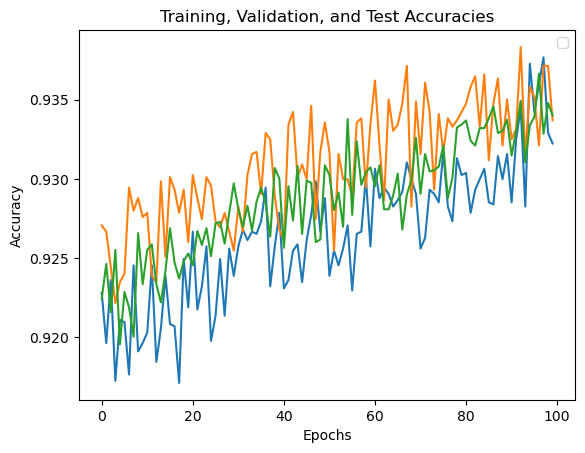

Best accuracy tensor(0.9383)


tensor(0.9383)

In [54]:
train_GAN(net_2, g, epochs=100)

In [ ]:
# check label similarity

import torch

def label_similarity(data):
    edge_index = data.edge_index
    labels = data.y

    # Get the labels for both nodes in each edge
    node_labels_start = labels[edge_index[0, :]]
    node_labels_end = labels[edge_index[1, :]]

    # Check if labels are the same and calculate the similarity ratio
    similar_labels = node_labels_start == node_labels_end
    similarity_ratio = similar_labels.float().mean().item()

    return similarity_ratio

# Example usage:
similarity = label_similarity(g)
print(f"Label similarity among connected nodes: {similarity:.2f}")


In [ ]:
# check feature similarity

from torch.nn.functional import cosine_similarity

def feature_similarity(data):
    edge_index = data.edge_index
    features = data.x

    # Get features of both nodes in each edge
    features_start = features[edge_index[0, :]]
    features_end = features[edge_index[1, :]]

    # Calculate cosine similarities
    similarities = cosine_similarity(features_start, features_end, dim=1)
    average_similarity = similarities.mean().item()

    return average_similarity

# Example usage:
feature_sim = feature_similarity(g)
print(f"Average feature similarity (cosine) among connected nodes: {feature_sim:.2f}")
